In [19]:
# Kullanılan kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Anomali Tespiti 




## Anomali Tespiti Nedir?

> Anomali tespiti, bir veri kümesinde verinin normal davranışına uymayan beklenmedik durumların veya kalıpların bulunması için kullanılan makine öğrenmesi algoritmasıdır. 






## Anomali Tespiti  Örnekleri 



*   Dolandırıcılık/Sahtekarlık tespiti 

*   Hatalı üretim tespiti 

*   Veri merkezlerindeki bilgisayarların çalışmasının kontrolü


 






# Algoritmanın Kurulması


Verilen bir veri kümesi için *anomali tespiti* yaparken **Normal Dağılım**dan ya da diğer adıyla **Gauss Dağılımı**ndan yararlanırız.

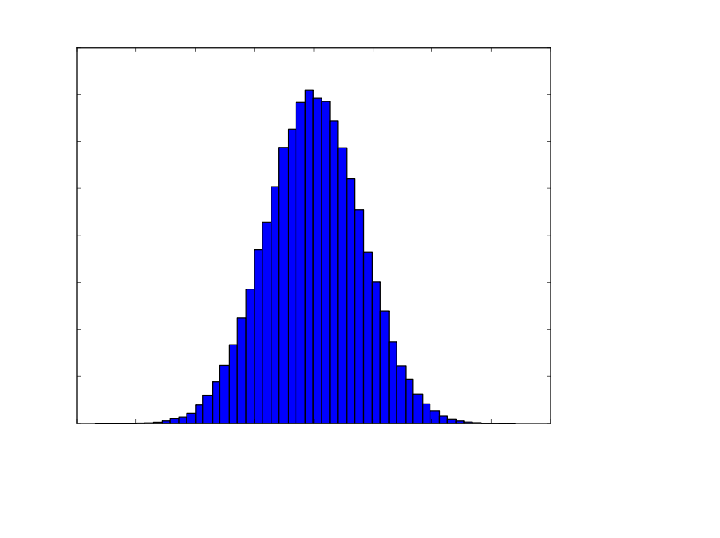

Bir verisetinin dağılımı bize verinin alabileceği değerler ve bu değerlerin hangi sıklıkla görüldüğü konusunda bilgi verir. 

Normal dağılım ya da Gauss dağılımı bir çok olguyu modelleyebilen ve bu yüzden de sıkça kullanılan bir olasılık dağılımıdır.

ORnek sinav notu dagilimi, ıq dagılımı, 
boy kılo bmı dagılımı







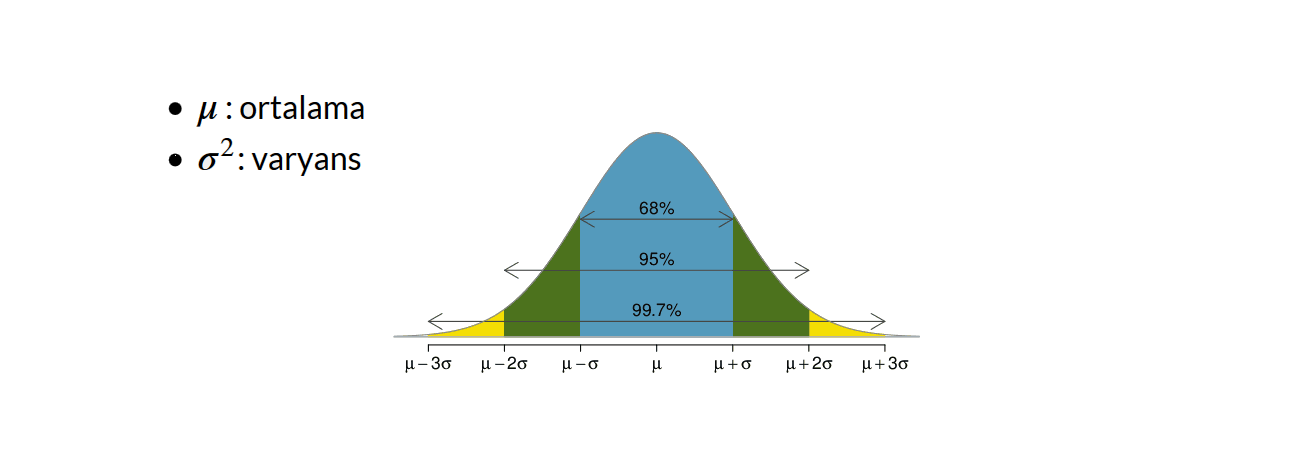


 Ortalamaya en yakın değerler görülme olasılığı (normal olma) olasılığı en yüksek değerlerken ortalamadan uzaklaştıkça ortaya çıkma ihtimalleri azalır. sigma $\sigma^2$ni  karekokudur. verilerin ortalamadan ne kadar uzağa yayıldıklarıyla ilgili verir. 

In [94]:

def param(X):
  m =  X.shape[0]
  mu = 1/m * np.sum(X, axis=0)                         # ortalama
  sigma2 = 1/m * np.sum(np.square(X-mu), axis=0)       # varyans
  return mu, sigma2

$ \{ x^{(1)}, x^{(2)}, ... ,  x^{(m)}\}$  şeklinde bir veriseti verildiğinde 

$$\begin{align}\displaystyle \mu =\frac{1}{m} \sum_{j=1}^m x^{(j)} \quad
 \displaystyle \sigma^2 = \frac{1}{m} \sum_{j=1}^m (x^{(j)} - \mu)^2 \end{align}$$

In [95]:
# Normal  dağılım
def gaussian(x, mu, sigma2):        # Girdiler skalar ya da vektor olabilir.  
  gaussian = 1/np.sqrt(2 * np.pi * sigma2)*np.exp(-np.square(x-mu)/(2*sigma2))
  return gaussian


...ve bu parametrelere karşılık gelen Normal Dağılım

$  \displaystyle p(x, mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2 }} \rm{e}^{-\frac{(x-\mu)^2}{2\sigma^2}} $

şeklinde verilir. 


In [22]:
#@title Farklı Ortalama ve Varyans Değerlerine Göre Gaussian Dağılımı

def graph2():
    fig, axs= plt.subplots(2,2,figsize=(14,8), sharex = True, sharey = True)

    xp = np.arange(-7,7,0.1)

    axs[0,0].plot(xp,gaussian(xp, 0, 1))
    #axs[0,0].axvline(x=0, color='gray',linestyle='--')
    axs[0,0].axvline(x=0, color='orange',linestyle='--')
    axs[0,0].set_title(r"$\mu = 0,\ \sigma^2 = 1$")

    axs[0,1].plot(xp,gaussian(xp, 0, 3))
    axs[0,1].axvline(x=0, color='gray',linestyle='--')
    axs[0,1].axvline(x=0, color='orange',linestyle='--')
    axs[0,1].set_title(r"$\mu = 0,\ \sigma^2 = 3$")

    axs[1,0].plot(xp,gaussian(xp, 2, 1))
    axs[1,0].axvline(x=0, color='gray',linestyle='--')
    axs[1,0].axvline(x=2, color='orange',linestyle='--')
    axs[1,0].set_title(r"$\mu = 2,\ \sigma^2 = 1$")

    axs[1,1].plot(xp,gaussian(xp, 0, 0.5))
    axs[1,1].axvline(x=0, color='orange',linestyle='--')
    #axs[1,1].axvline(x=-2, color='orange',linestyle='--')
    axs[1,1].set_title(r"$\mu = -2,\ \sigma^2 = 0.5$");

FArklı mu  ve sıgma degerlrının etkısı

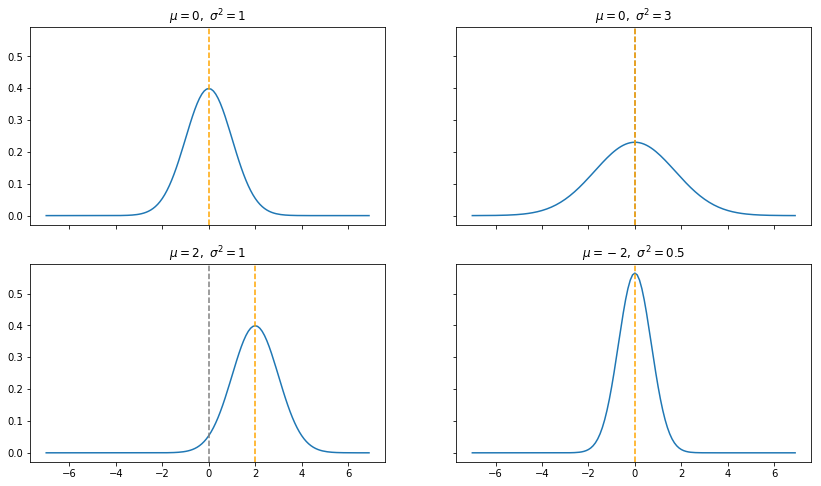

In [23]:
graph2()

In [24]:
#@title Sunucuların Dağılımı
#@markdown Amacımız bu veride varolan ya da yeni eklenen bir sunucunun diğerlerine göre anormal davranıp davranmadığını belirlemek.
def graph3():
    p_color = np.random.rand(307)
    plt.figure(figsize=(8, 6)) 
    plt.xlabel('Tepki Süresi (ms)')
    plt.ylabel('Veri Akış Hızı (mb/s)')

    plt.scatter( veri2D['tepki_suresi'], veri2D['akis_hizi'], c= 'steelblue', alpha=0.9, marker = r"x");


## Örnek çalışma: Hatalı sunucuları belirleme

Hatalı sunucuları belirleme

Bu çalışmada örnek olarak kullanacağımız veride sunucu olarak kullanılan bilgisayarların bir takım niteliklerinden yola çıkarak diğerlerinden farklı davranan sunucuları belirlemeye ve böylece hatalı çalışan sunucuları bulmaya çalışacağız.

Görsel sağlamak açısından iki nitelikten faydalanarak yaptığımız anomali tespitini daha sonra 11 nitelikten  faydalanarak oluşturulan daha büyük bir veri setinde deneyeceğiz. 
 

In [25]:
# Örnek 1 (2D)
veri2D = pd.read_csv(r"./ADex1", names=['tepki_suresi', 'akis_hizi'])
veri2D.tail(6)

tepki_suresi  akis_hizi
301     21.727134   4.126232
302     12.476629  14.459370
303     19.582573  10.411619
304     23.339868  16.298874
305     18.261188  17.978309
306      4.752613  24.350407

$ \{ x^{(1)}, x^{(2)}, ... ,  x^{(m)}\}$ örnek için 

$x^{(i)}= \left[ x^{(i)}_1,\ x^{(i)}_2,\  ...,\ x^{(i)}_n\right]$ olmak üzere  

$m$ örneğe  $n$ tane nitelikten oluşur. Öyle ki veri kümemizi $m \times n$'lik bir matris olarak hayal edebiliriz:

Kullandığımız veride , $m$ = 307, $n$=2 olup 
 
   $x_1=$ Tepki Süresi (ms) 

   $x_2=$ Veri Akış Hızı (mb/s)

olarak verilmektedir.







Biz örneklerimizde görsellik ve kolaylık açısından  "Pandas DataFrame" kullanacağız, fakat kodlarımız "NumPy array" için de çalışacak şekilde (bazı durumlarda opsiyonlu olarak) hazırlanmıştır.

Sunucuların Dağılımı

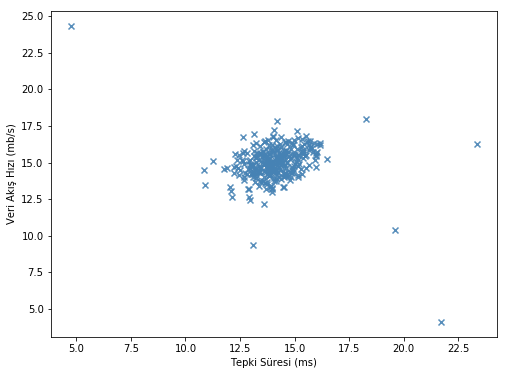

In [91]:
graph3()

In [29]:
#@title Her bir nitelik için Gauss dağılımı
# Her bir nitelik için Gauss dağılımı
def graph4():
    fig, (ax1, ax2)= plt.subplots(1,2,figsize=(14,6))

    xp = np.arange(0,25,0.1)

    ax1.plot(xp,gaussian(xp, mu2D[0], sigma2D[0]))
    ax1.axvline(x=mu2D[0], color='orange',linestyle='--')
    ax1.set_title("Gecikme Süresine Göre Dağılım:")
    ax2.plot(xp,gaussian(xp, mu2D[1], sigma2D[1]))
    ax2.axvline(x=mu2D[1], color='orange',linestyle='--')
    ax2.set_title("Veri Akımına Göre Dağılım");


Her bir nitelik için Gauss dağılımı

In [102]:
#@title Normal olma/anomali olmama olasılığı  
#@markdown  Burada kırmızı noktayı temsil eden sunucunun düzgün çalışan bir sunucu olma olasılığı sari noktaya göre daha düşüktür.gar
def graph5():
    #@title Normal olma/anomali olmama olasılığı  
    #@markdown  Burada kırmızı noktayı temsil eden sunucunun düzgün çalışan bir sunucu olma olasılığı sari noktaya göre daha düşüktür.gar
    plt.figure(figsize=(8, 6)) 
    plt.xlabel('Tepki Süresi (ms)')
    plt.ylabel('Veri Akış Hızı (mb/s)')

    plt.scatter(veri2D['tepki_suresi'], veri2D['akis_hizi'], c= 'steelblue', alpha=0.9, marker = r"x");
    plt.scatter(21.75,4.2, c= 'red', marker = r"x", s = 100, linewidth =3, label = 'anomali' )
    plt.scatter(15,15.5, c= 'yellow', marker = r"x", s = 100,linewidth =3, label = 'normal nokta');

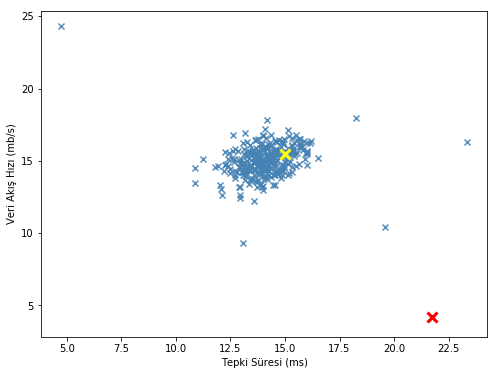

In [103]:
graph5()

Burada kırmızı noktayı temsil eden sunucunun düzgün çalışan bir sunucu olma olasılığı sari noktaya göre daha düşüktür. KArar asaması 

In [ ]:
def graph6():
    #
    fig = plt.figure(figsize=(8,6))
    left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
    ax = fig.add_axes([left, bottom, width, height]) 

    x = np.linspace(0, 26, 100)
    y = np.linspace(0, 26, 100)

    X, Y = np.meshgrid(x, y)
    Z = gaussian(X, mu2D[0], sigma2D[0]) * gaussian(Y, mu2D[1], sigma2D[1])


    lev = np.array ([10**(-12), 10**(-10), 10**(-8), 10**(-6),10**(-4), 10**(-2),  0.1] )
    # contourplot
    CS = ax.contour(X, Y, Z,cmap='viridis', levels = lev)
    # seviye etiketleri
    fmt = {}
    strs = ["$10^{-12}$", "$10^{-10}$", "$10^{-8}$", "$10^{-6}$","$10^{-4}$", "$10^{-2}$",  "$10^{-1}$" ]
    for l, s in zip(CS.levels, strs):
        fmt[l] = s
    ax.clabel(CS, inline=1, fontsize=10,  fmt=fmt )
    ax.set_title('$p(x)$ seviyeleri')
    p_color = np.random.rand(307)
    ax.set_xlabel('Tepki Süresi (ms)')
    ax.set_ylabel('Veri Akış Hızı (mb/s)')


    ax.scatter(veri2D['tepki_suresi'], veri2D['akis_hizi'], c= 'steelblue', alpha=0.9, marker = r"x");
    ax.scatter(21.75,4.2, c= 'red', marker = r"x", s = 100, linewidth =3, label = 'anomali' )
    ax.scatter(15,15.5, c= 'yellow', marker = r"x", s = 100,linewidth =3, label = 'normal nokta');

## Model: $p(x)$



 Model: $p(x)$



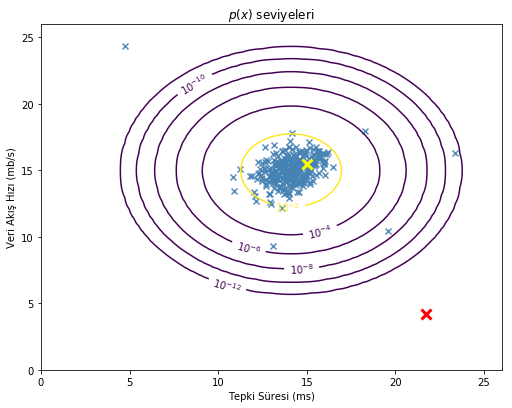

In [53]:
graph6()

In [27]:
#@markdown Sırasıyla  "Tepki Süresi" ve "Veri Akış Hızı"  niteliklerinin ortalaması
# Her bir niteliğin ortalaması:
mu2D = param(veri2D)[0].round(3)
mu2D

tepki_suresi    14.112
akis_hizi       14.998
dtype: float64

In [32]:
#@markdown Sırasıyla  "Tepki Süresi" ve "Veri Akış Hızı"  niteliklerinin varyansları
# Her bir niteliğin varyansı
sigma2D = param(veri2D)[1].round(3)
sigma2D

tepki_suresi    1.833
akis_hizi       1.710
dtype: float64

Her bir seviye eğrisi $p(x)$'in belli değerlerine karşılık gelir ve dışarı doğru gittikçe küçülür. Belirlediğimiz bir $\epsilon$ sayısına göre herhangi bir $ x $ verisi için

$$ \begin{cases} 
p(x) < \epsilon\quad \mbox{ise}\quad \mbox{x  anomali }\\
p(x) > \epsilon\quad \mbox{ise}\quad \mbox{x anomali değildir}
\end{cases}$$

In [34]:
#  Verilen bir epsilon değeri ve model için anomali tespiti

def anomali_bul(model, epsilon, veri_test):
  pveri = veri_test.apply(model, axis =1)
  anomali_nok = veri_test[(pveri < epsilon)]
  anomali_sayisi = anomali_nok.shape[0]
  print(veri_test.shape[0] , 'veriden', anomali_sayisi, 'tanesi anomalidir.' )
  return anomali_nok

In [ ]:
Veri elimizde, modeli ve epsılonu bulmak mesele

##  Modelin Bulunması

Model fonksiyonu $p(x)$ "Normal Dağılım" tarafından belirlenir.

m eğitme verisi:  $ \{ x^{(1)}, x^{(2)}, ... ,  x^{(m)}\}$  
Her bir örnek için nitelikler:  $x_i=\{ x^{(1)}_i, x^{(2)}_i, ... ,  x^{(m)}_i\}$ ise 

$$\begin{align}\displaystyle \mu_i =&\frac{1}{m} \sum_{j=1}^m x^{(j)}_i\\ 
 \displaystyle \sigma^2_i =& \frac{1}{m} \sum_{j=1}^m (x^{(j)}_i - \mu_i)^2 \end{align}$$

Örneğimizde daha önce de belirttiğimiz üzere $m$ = 307, $n$=2 olup ortalama ve varyans değerlerini

| | $\mu$ | $\sigma^2$|
| --- | --- | --- |
| Tepki Süresi | 14.112 | 1.833 |
| Veri Akış Hızı | 14.998 | 1.710| 


olarak bulmuştuk.

Herhangi bir $x$ örneği ya da test verisi için

$$  \displaystyle p(x_i, mu, \sigma^2) =\frac{1}{\sqrt{2 \pi \sigma_i^2 }} \rm{e}^{-\frac{(x_i-\mu_i)^2}{2\sigma_i^2}} $$

olmak üzere

$$  p(x) = \prod_{i=1}^n p(x_i, mu, \sigma^2)$$

şeklinde hesaplanır.








In [99]:
# p(x)'in hesaplanmasi

def model(X):                                         # X = etiketlenmemiş egitme verisi
  mu = param(X)[0]                                    # ortalama
  sigma2 = param(X)[1]                                # varyans
  p_x = lambda x: np.prod(gaussian(x, mu, sigma2))    # olasılık fonksiyonlarının çarpımı
  return p_x                                          # nitelik vektörü ile aynı boyutta vektör alan bir fonksiyon doner

In [100]:
# Örnek 1 için model fonksiyonu p(x)
p2D_x = model(veri2D)

In [96]:
p2D_x([14,14])

0.06697300903978197

In [37]:

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
x = np.linspace(3, 26, 100)
y = np.linspace(5, 24, 100)

X, Y = np.meshgrid(x, y)
Z = gaussian(X, mu2D[0], sigma2D[0])*gaussian(Y, mu2D[1], sigma2D[1])
# Normalize the colors based on Z value
norm = plt.Normalize(Z.min(), Z.max())
color_p = cm.jet(norm(Z))

lev2 = np.array([10**(-10), 10**(-7), 10**(-5), 10**(-3), 0.5*10**(-2), 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.089])
def graph7():
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8), subplot_kw=dict(projection='3d') )

    
    ax1.plot_surface(X, Y, Z, cmap = 'viridis');

    ax1.set_xlabel('Tepki Süresi')
    ax1.set_ylabel('Veri  Akış Hızı')
    # Get rid of the panes
    ax1.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax1.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax1.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # Get rid of the ticks
    ax1.set_xticks([]) 
    ax1.set_yticks([]) 

    ax2.contour3D(X, Y, Z, levels = lev2, cmap = 'viridis' );
    ax2.set_xlabel('Tepki Süresi')
    ax2.set_ylabel('Veri Akış Hızı')
    # Get rid of the panes and ticks
    ax2.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax2.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax2.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax2.set_xticks([]) 
    ax2.set_yticks([])


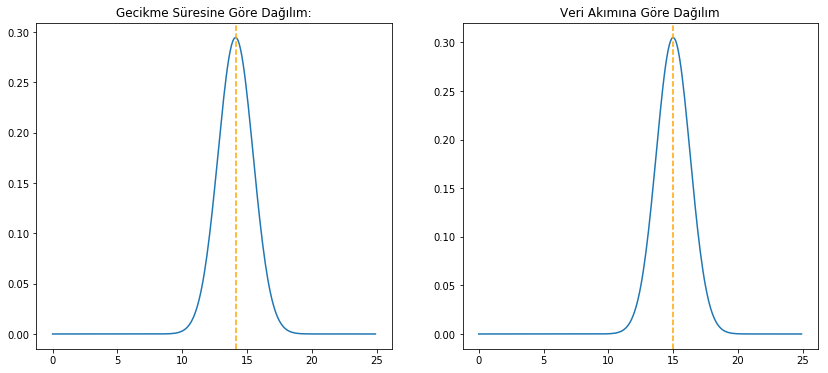

In [31]:
graph4()

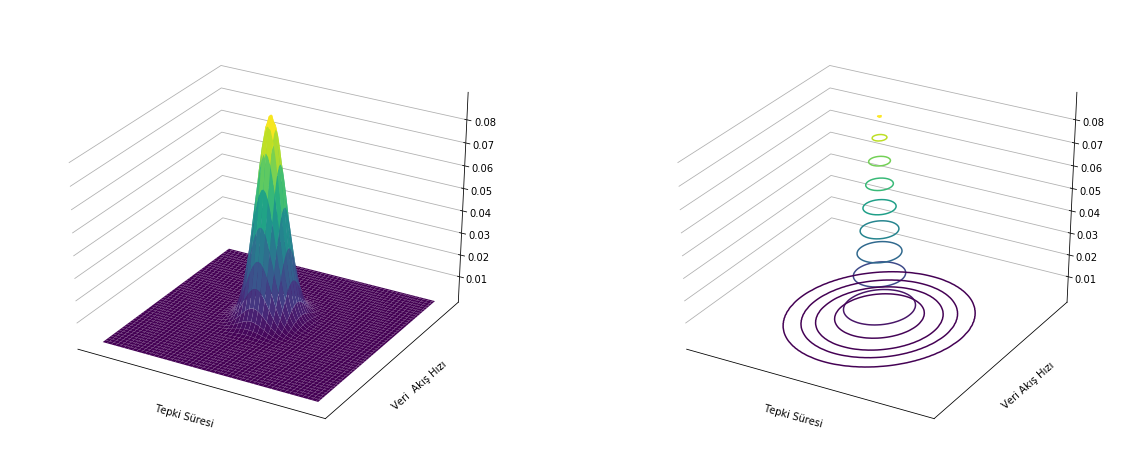

In [59]:
graph7()

Bu değerlere göre $p(x)$ fonksiyonunun grafiği soldaki şekildeki  görünür ve bahsettiğimiz seviye eğrileri sağ taraftaki eğrilerin gölgeleridir.

In [39]:
#@title p(x) seviyeleri 
def graph8():
  

    fig = plt.figure(figsize=(16,12))


    # Second subplot
    ax0 = fig.add_subplot(2, 2, 2)
    
    x = np.linspace(3, 26, 100)
    y = np.linspace(5, 24, 100)
    lev2 = np.array([10**(-10), 10**(-7), 10**(-5), 10**(-3), 0.5*10**(-2), 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.089])

    x0 = np.linspace(3, 26, 100)
    y0 = np.linspace(5, 24, 100)

    X0, Y0 = np.meshgrid(x0, y0)
    Z0 = gaussian(X0, mu2D[0], sigma2D[0]) * gaussian(Y0, mu2D[1], sigma2D[1])

    # contourplot
    ax0.contour(X0, Y0, Z0, cmap='viridis', levels = lev2)

    #ax.clabel(CS, inline=1, fontsize=10)
    ax0.set_title('Olasılık Seviyeleri')
    p_color = np.random.rand(307)
    ax0.set_xlabel('Tepki Süresi (ms)')
    ax0.set_ylabel('Veri Akış Hızı (mb/s)')
    ax0.yaxis.tick_right()          # moves plot ticks to right
    ax0.yaxis.set_label_position("right")   # moves label to right

    ax0.scatter(veri2D['tepki_suresi'], veri2D['akis_hizi'], c= 'steelblue', alpha=0.9, marker = r"x");

    # First subplot
    ax2 = fig.add_subplot(2, 2, 1, projection='3d')

    ax2.contour3D(X, Y, Z, levels = lev2, cmap = 'viridis' );
    ax2.scatter(veri2D['tepki_suresi'], veri2D['akis_hizi'], 0, c= 'steelblue', alpha=0.9, marker = r"x");
    ax2.set_xlabel('Tepki Süresi')
    ax2.set_ylabel('Veri Akış Hızı')
    # Get rid of the panes and ticks
    ax2.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax2.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax2.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax2.set_xticks([]) 
    ax2.set_yticks([])
    ax2.set_zlim(0, 0.1)
    plt.show()

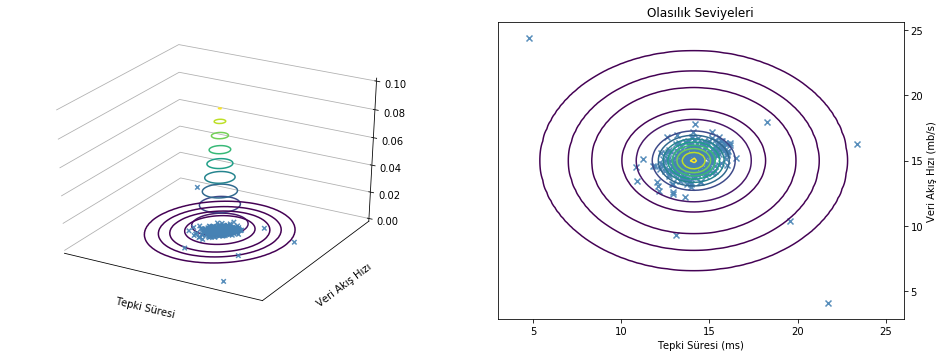

In [97]:
graph8()

## Eşik Değeri ($\epsilon$) Seçimi:

Eşik değeri seçimi biraz subjektif bir meseledir. Probleme göre farklılık gösterebilir. Biz burada daha önceki tecrübelere dayanarak anomali olarak etiketlenmiş veriden faydalanarak eşik değerini belirlemeye çalışacağız.

Daha önce düzgün çalışmayan sunucuların  davranışlarından yola çıkarak etiketlenmiş bir *doğrulama veri kümesi* kullanarak anomalileri belirlemeye çalışacağız.

In [69]:
# Doğrulama veri kümesi(Validation set)
veri2D_dv = pd.read_csv(r"./ADex1_val", names=['tepki_suresi', 'akis_hizi', "anomali"])
veri2D_dv.loc[297:300]

tepki_suresi  akis_hizi  anomali
297     14.293345  15.991383        0
298     14.952482  14.364053        0
299     14.734046  15.818331        0
300     19.289540  10.675741        1

In [70]:
#@title Doğrulama kümesi
#@markdown Daha önceki gözlemlere dayanarak  sunucular arasında düzgün çalışmadığı belirlenen sunucular grafikte anomali olarak işaretlenmiştir.
def graph9():
    plt.figure(figsize=(8, 6)) 
    plt.xlabel('Tepki Süresi')
    plt.ylabel('Veri Akış Hızı')

    plt.scatter(veri2D_dv['tepki_suresi'], veri2D_dv['akis_hizi'], c= 'steelblue',  marker = r"x");
    plt.scatter(veri2D_dv[veri2D_dv.anomali == 1].tepki_suresi, veri2D_dv[veri2D_dv.anomali == 1].akis_hizi, edgecolors= 'orange', marker = r'o', s=200, linewidth =2, facecolors= 'none');
    dv_anomali = veri2D_dv[veri2D_dv.anomali == 1].count()[2]
    

Etiketlenmiş doğrulama verisi

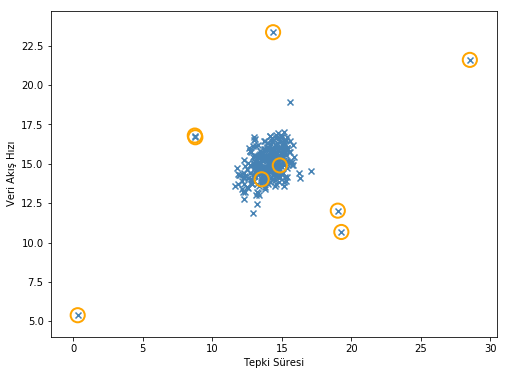

In [71]:
graph9()

## Eşik Değeri ($\epsilon$) Seçimi:

### F1 değerlendirme  ölçütü
Eşik değerini ne kadar iyi seçtiğimizi belirlerken kesinlik ve hassasiyet arasında iyi bir denge kuran F1 değerlendirme ölçütünü (F1-skoru) kullanacağız.








In [76]:
# F1 skoru hesaplama

def F1(tahmin, y):                                         # Tahmin ve y için  0 ve 1 sayilarindan olusan bir vektor ya da dataframe olarak giriniz.

  dp = len(np.where( (y == 1)  & (tahmin == 1) )[0])       # dogru pozitif 
  yp = len(np.where( (y == 0)  & (tahmin == 1) )[0])       # yanlis pozitif 
  yn = len(np.where( (y == 1)  & (tahmin == 0) )[0])       # yanlis negatif 
    
  prec = dp/(dp + yp);           # kesinlik
  rec =  dp/(dp + yn);           # hassasiyet
  F1 = 2*(prec*rec)/(prec+rec);  # F1 skoru
  return F1

Eşik Değeri Seçme Algoritmamız:

1. Modeli  kullanarak doğrulama kümesindeki her x noktası için $p(x)$'i belirle.
2. $min\ p(x)$ ve $max\ p(x)$ arasındaki değerler arasından seçilen her   $\epsilon$ için
$$ \begin{cases} 
p(x) < \epsilon\quad \mbox{ise}\quad \mbox{x  anomali }\\
p(x) > \epsilon\quad \mbox{ise}\quad \mbox{x anomali değil }
\end{cases}$$
olarak işaretleyerek bir tahmin vektörü oluştur.
3. Tahmin ve doğrulama kümesinde verilen gerçek değerleri karşılaştırıp F1 skoru bul.
4. Denenilen $\epsilon$'lardan F1-skoru en büyük olan $\epsilon$'u  seç.







In [77]:
# Verilen model ve doğrulama verisine göre epsilon secer:

def epsilon_sec(model, x_dv, y_dv):
  # Dogrulama kumesindeki her x icin p(x) hesaplanir
  p_dv = np.apply_along_axis(model, 1, x_dv) ## numpy array için
  tahmin = p_dv
  bestF1 =0 

  for epsilon in np.linspace(p_dv.min(),p_dv.max(), 1000):
    # seçilen epsilona göre anomali tahmini
    tahmin[np.where(p_dv > epsilon)] = 0      
    tahmin[np.where(p_dv < epsilon)] = 1
    F1_dv = F1(tahmin, y_dv)
    # en iyi epsilonu secme
    if F1_dv > bestF1:               
      bestF1 = F1_dv
      bestEpsilon = epsilon
  return bestEpsilon

İncelediğimiz örnekte modelimizin

```
p2D_x = model(veri2D)
```
olarak ve doğrulama veri kümesinin *veri2D_dv* olarak isimlendirdiğimizi hatırlayalım. Bu durumda en iyi epsilon değeri aşağıdaki gibi verilecektir: 


In [78]:
epsilon2D= epsilon_sec(p2D_x, veri2D_dv[['tepki_suresi', 'akis_hizi']], veri2D_dv['anomali'])
epsilon2D

8.999852631901394e-05

Anomali bulma fonksiyonumuzu hatırlayalım:

```
def anomali_bul(model, epsilon, veri_test):
...
```

In [80]:
anomali2D= anomali_bul(p2D_x, epsilon2D, veri2D)
anomali2D

307 veriden 6 tanesi anomalidir.


tepki_suresi  akis_hizi
300     13.079310   9.347878
301     21.727134   4.126232
303     19.582573  10.411619
304     23.339868  16.298874
305     18.261188  17.978309
306      4.752613  24.350407

In [83]:
def graph10():
    #@title Anomalilerin İşaretlenmesi
    #@markdown  

    plt.figure(figsize=(9, 7)) 
    plt.xlabel('Tepki Süresi (ms)')
    plt.ylabel('Veri Akış Hızı (mb/s)')

    plt.scatter(veri2D['tepki_suresi'], veri2D['akis_hizi'], c= 'steelblue', alpha=0.9, marker = r"x");
    plt.scatter(anomali2D['tepki_suresi'],anomali2D['akis_hizi'], edgecolors= 'red', marker = r'o', s=200, linewidth =2, facecolors= 'none' );
    x = np.linspace(0, 26, 100)
    y = np.linspace(0, 26, 100)

    X, Y = np.meshgrid(x, y)
    Z = gaussian(X, mu2D[0], sigma2D[0]) * gaussian(Y, mu2D[1], sigma2D[1])
    # contourplot
    C= plt.contour(X, Y, Z,cmap='viridis', levels = [epsilon2D])

    plt.clabel(C, inline=1, fmt ="$\epsilon = 9x10^{-5}$" ,fontsize=10);

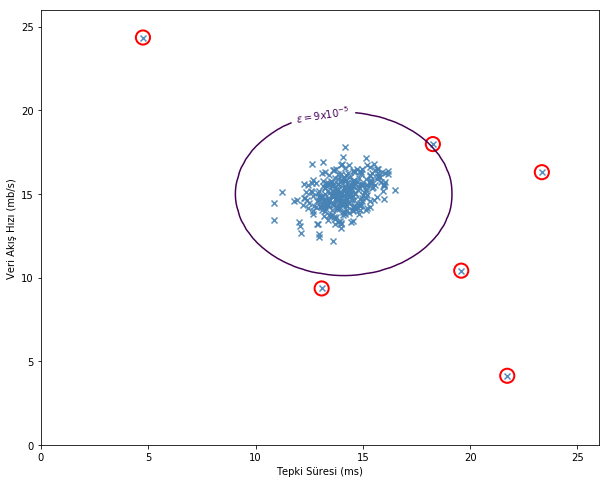

In [82]:
graph10()

Özetle anomali tespitini yaparken 

1. Verinin dağılıma göre $p(x)$'i belirleriz.
  
2. Etiketli bir veri kullanarak ya da subjektif olarak  eşik değeri seçeriz.

3. Eşik değerini kullanarak anomalileri belirleriz.



Şimdiye kadar 2 niteliğe sahip bir örnek üzerinde çalıştık. Kurduğumuz algoritma ve oluşturduğumuz fonksiyonlar herhangi bir nitelik sayısı için de geçerli olacaktır. O yüzden şimdi algoritmanın nasıl çalıştığını özetlemek adına sunucuların diğer özelliklerini de göz önüne alarak oluşturulan daha çok nitelikli ve daha gerçekci bir veri kümesi alalım ve burdaki anomalileri tespit etmeye çalışalım. 

**(0)** Verinin okunması

In [84]:
# Örnek 2 (11D): Örnek verinin okunması
## Sütun isimleri
colnames = [] 
for i in range(1,12):
  colnames.append("Nitelik " + str(i))
veri11D = pd.read_csv(r"./ADex2", names= colnames)
veri11D.sample(4)

Nitelik 1  Nitelik 2  Nitelik 3  Nitelik 4  Nitelik 5  Nitelik 6  \
281   7.452647 -12.288335   8.642975 -35.968341 -11.929317  15.112845   
960   5.531215  -9.854202  28.799444  -3.093173   8.554478  16.291028   
554  -2.412726 -12.044596  15.108118  -1.967563 -14.637433   8.074576   
174  18.703561  -1.062856  -2.673506 -20.951659 -11.169384  17.254960   

     Nitelik 7  Nitelik 8  Nitelik 9  Nitelik 10  Nitelik 11  
281  -5.242866  19.400414  -9.721430  -14.608607    4.393329  
960  -1.758671  10.871513  -9.450252   -8.757734    0.620094  
554  -9.338133   5.095474  -1.688567   -9.693132    4.361548  
174  -7.258420  -3.456287   3.849866   -1.845370    5.358850



**(1)** Verilen 11 nitelikli veriyi alarak ortalama ve varyans değerlerini hesaplayıp bunlara  karşılık gelen model $p(x)$'in hesaplanması 



In [85]:
# Model p(x) fonksiyonunun bulunması

p11D_x = model(veri11D)


**(2)** Doğrulama verisetini kullanarak eşik değerinin hesaplanması. 

In [87]:
# Doğrulama veriseti (Validation set)

colnames_dv = colnames +['Anomali' ]          #y sütunu için isimlendirme
veri2D_dv = pd.read_csv("./ADex2_val", names= colnames_dv)
veri2D_dv.head(4)

Nitelik 1  Nitelik 2  Nitelik 3  Nitelik 4  Nitelik 5  Nitelik 6  \
0  18.271283 -12.359268   5.000970   1.611472   1.088592  29.314410   
1  -3.193070 -19.705821   6.528556 -21.570858   3.050556  23.477503   
2  -5.256678 -12.918720  25.435141  -7.231568   3.647838  12.366550   
3  12.953176 -10.350333  19.857858 -24.424608   3.266105  30.445294   

   Nitelik 7  Nitelik 8  Nitelik 9  Nitelik 10  Nitelik 11  Anomali  
0  -8.313531  36.438338  -9.476679  -25.928183    7.108628        1  
1  -1.133420  12.688409 -10.968301   -1.198666    1.908441        0  
2  -6.512076   8.750902  -0.768755   -3.261094   13.729474        0  
3 -11.125842  12.815629   9.351355   -6.113624   17.627375        1

In [101]:
x11D_dv = veri2D_dv.iloc[:, :11]                             # 11 nitelik vektorundan olusan df
y11D_dv = veri2D_dv.iloc[:, 11]                              # gercek deger vektoru
epsilon11D=  epsilon_sec(p11D_x, x11D_dv, y11D_dv)           # esik degeri

print('Eşik değeri', '{:.3E}'.format(epsilon11D), 'olarak bulunmuştur.')

Eşik değeri 1.379E-18 olarak bulunmuştur.


**(3)** Örnek veriseti içinde eşik değerinin dışında kalan noktaları anomali olarak listenmesi:

In [89]:
anomali11D = anomali_bul(p11D_x, epsilon11D, veri11D)
anomali11D

1000 veriden 117 tanesi anomalidir.


Nitelik 1  Nitelik 2  Nitelik 3  Nitelik 4  Nitelik 5  Nitelik 6  \
9    15.107877 -16.430766  19.707360 -19.811888  -1.644537  -6.444184   
20   12.411706   3.150959  14.827734 -10.482672  -8.250082  -7.982698   
21   20.946754   1.048170   8.296324  -2.595042 -14.061970   8.776611   
30    5.127033 -18.517137  11.422480 -28.993408  -5.797960 -15.989215   
39   11.622006  -0.229723  10.005823  -9.700729 -14.765493  26.933578   
56   -5.689178  -9.707423  22.258180   7.890772 -11.397641  34.445407   
62   16.452993 -15.320026  17.283979  -5.896654  -2.940964  12.148073   
63   -1.907518 -10.191011   5.041437 -31.539885   0.761368   2.671201   
69   -2.665572  -1.793277  -3.312666 -11.771151 -22.948824   0.657702   
70   -2.120839 -22.573352  10.638703  -2.064867   0.942871 -11.136318   
77  -12.692722 -11.498905   0.026479  -8.809048 -16.233664  -6.701840   
79   14.552377 -38.593613  19.161298 -11.379035 -24.679817  29.394102   
86    3.968173  -0.948445  16.390532   4.925583 -30.252147  14.208280   
103  21.302835 -22.478786  22.219274 -10.333549 -15.153760  22.316417   
130  12.981934   8.319031  19.570986 -17.000717 -23.493794  16.981319   
147 -14.696577 -17.209237  14.525584 -20.475409   6.159271  12.879206   
154   6.104585   3.181527  -3.318357 -23.428609 -14.559891  20.376025   
166  18.829449   1.171611  -0.177123  -3.604261  -3.413298  19.523349   
175   8.511318 -16.107225  29.176976 -21.298302 -29.855874   0.995455   
176  -5.513919  -6.838657   4.026831  -7.059106   0.967883  15.205973   
198  19.861932  -7.857506   5.643955  -4.439531  -0.846037  26.410503   
209 -10.373139 -33.577658  14.393455  -3.373885 -12.078383   1.415410   
212   6.766758  -4.407579  10.305895  -4.400896   6.754287  23.584760   
218   1.081479 -12.690507  31.537406   9.477382 -15.676929   1.106263   
222 -15.600509 -20.351230  18.334728  10.487489 -16.037635   1.283141   
227   6.075045 -23.857709  11.693187   4.866555 -11.308274 -14.698708   
229  17.438743 -12.615899   0.789213   1.746310 -13.324761  -4.484684   
233  -0.345422  -9.868085  26.251767 -25.748620 -22.168480   0.075066   
244   8.782745 -11.039724  19.792848  -7.454397 -11.136051  -5.493029   
262   1.815232   6.536839  15.958974   6.231871   5.501488  -4.844246   
..         ...        ...        ...        ...        ...        ...   
702  -7.107823  -2.659451  -9.913776   7.865090 -15.062972  -6.669139   
705  14.410571 -22.477726   3.857208  -2.952726 -24.880941  26.884771   
713   2.024200 -17.995892  18.120255   9.302085 -20.657652  -1.342614   
721  24.161473   2.150718  22.656128 -13.834454   4.338249  -5.126474   
741 -11.113160  -5.647850  23.260981   4.848569  -6.399478  18.210016   
750 -11.316527  -8.600399  25.029113  -2.779305  -2.414419  18.946212   
757  10.463708 -21.580878  23.946622   7.302745 -22.052180   0.784292   
758  -2.731858  -1.160324  -1.203266  -9.844513  -8.309690  27.409155   
787  -0.343405  -2.980590   3.574230  10.676147  -3.662173   2.813027   
831  -1.741997  -1.487631  27.069244  -7.585768   2.936218  24.616908   
834  -9.546285  -5.598474  16.340206  -0.153478 -14.982139   2.475574   
836  12.453219  -4.065051  17.536215   7.543518   8.571374  20.703939   
839  13.419761   7.410299  23.401764 -17.150200  -8.987999  16.752096   
846  -8.993098 -24.137958   8.507993 -28.898992  -4.012547  -2.715727   
870   7.663754 -21.315959  10.085647 -13.476459   1.869769  31.556190   
885  -9.653924 -10.097966   6.088028 -17.224249 -35.351822   2.677276   
887   5.591235   6.707069  25.261202   7.251960 -15.335947   6.264382   
890   5.349885 -12.919083  12.132417 -30.097538 -23.687714  15.293885   
901  11.459300  -6.873557  24.064825   0.688340 -14.256252 -14.539024   
911  -3.840912 -12.800335   1.341582  -5.303823 -11.195030  -0.078478   
930  12.687826  -7.989794  15.536974   6.641290   1.062005  33.352865   
939   0.117894 -24.108314  25.600026  -2.184434 -26.406851   9.524311   
940 -14.471792 -12.099130  17.744803  -5.173237 -13.187795  -3.